In [1]:
#Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objs as go

In [59]:
# read data
creditData = pd.read_csv('/Users/stevenmacauda/Jupyter-Notebooks/creditDefault.csv')

In [60]:
creditData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [61]:
#Let's rename the column Pay_0 to Pay_1 to make it continuous.
creditData.rename(columns={'PAY_0':'PAY_1'}, inplace=True)

#Also rename credit Default next month to Credit_Default.
creditData.rename(columns={'default payment next month':'Credit_Default'}, inplace=True)

In [62]:
#Check the data types of the columns
creditData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ID              30000 non-null  int64
 1   LIMIT_BAL       30000 non-null  int64
 2   SEX             30000 non-null  int64
 3   EDUCATION       30000 non-null  int64
 4   MARRIAGE        30000 non-null  int64
 5   AGE             30000 non-null  int64
 6   PAY_1           30000 non-null  int64
 7   PAY_2           30000 non-null  int64
 8   PAY_3           30000 non-null  int64
 9   PAY_4           30000 non-null  int64
 10  PAY_5           30000 non-null  int64
 11  PAY_6           30000 non-null  int64
 12  BILL_AMT1       30000 non-null  int64
 13  BILL_AMT2       30000 non-null  int64
 14  BILL_AMT3       30000 non-null  int64
 15  BILL_AMT4       30000 non-null  int64
 16  BILL_AMT5       30000 non-null  int64
 17  BILL_AMT6       30000 non-null  int64
 18  PAY_AMT1        30000 non-

In [63]:
#Check for the presence of nulls
creditData.isnull().sum()

ID                0
LIMIT_BAL         0
SEX               0
EDUCATION         0
MARRIAGE          0
AGE               0
PAY_1             0
PAY_2             0
PAY_3             0
PAY_4             0
PAY_5             0
PAY_6             0
BILL_AMT1         0
BILL_AMT2         0
BILL_AMT3         0
BILL_AMT4         0
BILL_AMT5         0
BILL_AMT6         0
PAY_AMT1          0
PAY_AMT2          0
PAY_AMT3          0
PAY_AMT4          0
PAY_AMT5          0
PAY_AMT6          0
Credit_Default    0
dtype: int64

In [64]:
creditData['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [65]:
#Gender 1- Male, 2- Female
creditData['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [66]:
#We know that there are only education categories ranging from 1 to 4(1 = graduate school; 2 = university; 3 = high school; 4 = others). 
#Let us put everything else in Category 4. 
creditData["EDUCATION"]=creditData["EDUCATION"].map({0:4,1:1,2:2,3:3,4:4,5:4,6:4})

In [67]:
creditData['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [68]:
#We know that there are 3 marriage categories(1 = married; 2 = single; 3 = others). 
#Let us put category 0 also in category 3 of others.
creditData["MARRIAGE"]=creditData["MARRIAGE"].map({0:3,1:1,2:2,3:3})

In [69]:
creditData['AGE'].describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

In [70]:
pay0=creditData['PAY_1'].value_counts()
pay2=creditData['PAY_2'].value_counts()
pay3=creditData['PAY_3'].value_counts()
pay4=creditData['PAY_4'].value_counts()
pay5=creditData['PAY_5'].value_counts()
pay6=creditData['PAY_6'].value_counts()
print(pay0,pay2,pay3,pay4,pay5,pay6)

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_1, dtype: int64  0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64  0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64  0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 1        2
 8        2
Name: PAY_4, dtype: int64  0    16947
-1     5539
-2     4546
 2     2626
 3      178
 4       84
 7       58
 5       17
 6        4
 8        1
Name: PAY_5, dtype: int64  0    16286
-1     5740
-2     4895
 2     2766
 3      184
 4       49
 7       46
 6       19
 5       13
 8        2
Name: PAY_6, dtype: int64


In [71]:
#-1 stands for paid duly, let's put all the -2s and 0s into category -1.
creditData["PAY_1"]=creditData["PAY_1"].map({-2:-1,-1:-1,0:-1,1:1,2:2,3:3,4:4,5:5,6:6,7:7,8:8})
creditData["PAY_2"]=creditData["PAY_2"].map({-2:-1,-1:-1,0:-1,1:1,2:2,3:3,4:4,5:5,6:6,7:7,8:8})
creditData["PAY_3"]=creditData["PAY_3"].map({-2:-1,-1:-1,0:-1,1:1,2:2,3:3,4:4,5:5,6:6,7:7,8:8})
creditData["PAY_4"]=creditData["PAY_4"].map({-2:-1,-1:-1,0:-1,1:1,2:2,3:3,4:4,5:5,6:6,7:7,8:8})
creditData["PAY_5"]=creditData["PAY_5"].map({-2:-1,-1:-1,0:-1,1:1,2:2,3:3,4:4,5:5,6:6,7:7,8:8})
creditData["PAY_6"]=creditData["PAY_6"].map({-2:-1,-1:-1,0:-1,1:1,2:2,3:3,4:4,5:5,6:6,7:7,8:8})

Text(0.5, 1.0, 'Plot of default status for next month')

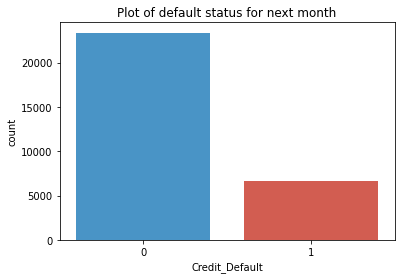

In [72]:
#prediction labels
flatui = ["#3498db","#e74c3c"]
sns.countplot(x='Credit_Default', data=creditData, palette=flatui).set_title("Plot of default status for next month")

Text(0.5, 1.0, 'Plot of default status for next month vs Limit Balance')

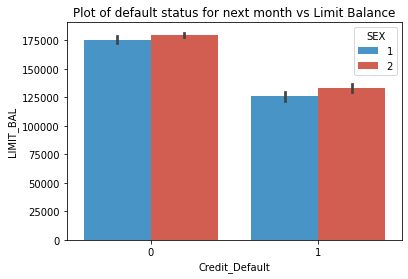

In [73]:
#default payment vs Limit_bal wrt gender
sns.barplot(x="Credit_Default",y="LIMIT_BAL", hue="SEX", 
            data=creditData, palette=flatui).set_title("Plot of default status for next month vs Limit Balance")

([<matplotlib.axis.XTick at 0x13b8dc100>,
 [Text(3, 0, 'Others'),
  Text(2, 0, 'High School'),
  Text(1, 0, 'University'),
  Text(0, 0, 'Grad School')])

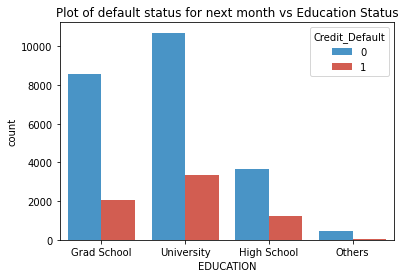

In [74]:
#Education levels count vs default payments
sns.countplot(x="EDUCATION", hue="Credit_Default", data=creditData, palette=flatui).set_title("Plot of default status for next month vs Education Status")
labels = ['Others', 'High School', 'University', 'Grad School']
plt.xticks([3,2,1,0], labels, rotation=0)

([<matplotlib.axis.XTick at 0x13b943880>,
 [Text(2, 0, 'Others'), Text(1, 0, 'Single'), Text(0, 0, 'Married')])

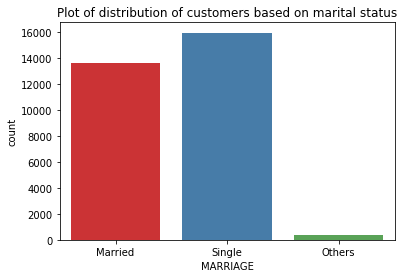

In [75]:
#Marriage levels count
sns.countplot(x="MARRIAGE", data=creditData, palette="Set1").set_title("Plot of distribution of customers based on marital status")
labels = ['Others', 'Single', 'Married']
plt.xticks([2,1,0], labels, rotation=0)

([<matplotlib.axis.XTick at 0x13b9a47c0>,
 [Text(2, 0, 'Others'), Text(1, 0, 'Single'), Text(0, 0, 'Married')])

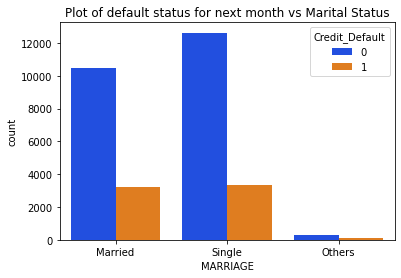

In [76]:
#Marriage levels vs defaul payments
sns.countplot(x="MARRIAGE", hue="Credit_Default", data=creditData, palette="bright").set_title("Plot of default status for next month vs Marital Status")
labels = ['Others', 'Single', 'Married']
plt.xticks([2,1,0], labels, rotation=0)

<AxesSubplot:xlabel='PAY_6', ylabel='count'>

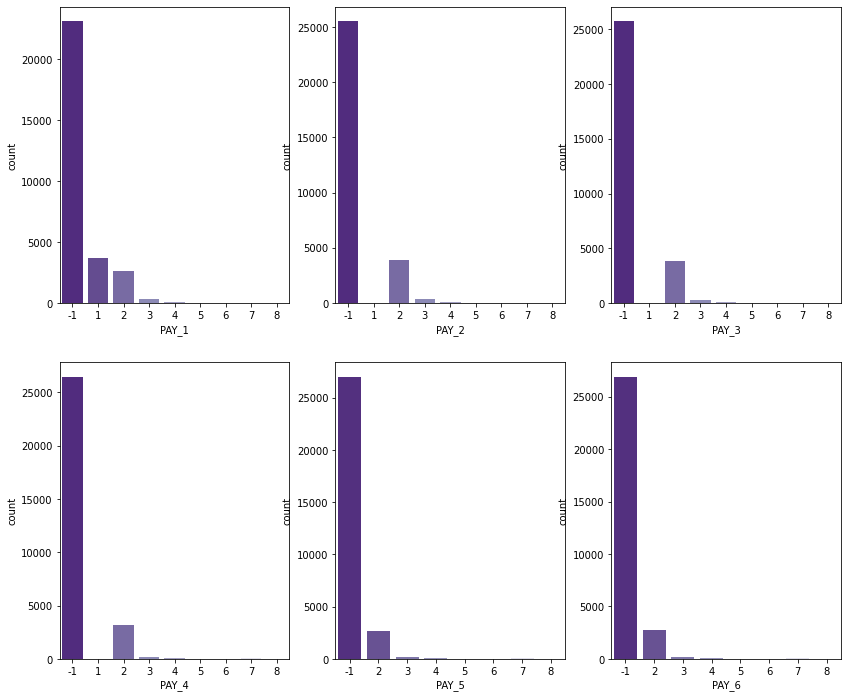

In [77]:
#All Repayment(Pay) distributions
fig = plt.figure(figsize=(14,12))
fig.add_subplot(231)
sns.countplot(x="PAY_1", data=creditData,palette="Purples_r")
fig.add_subplot(232)
sns.countplot(x="PAY_2", data=creditData,palette="Purples_r")
fig.add_subplot(233)
sns.countplot(x="PAY_3", data=creditData,palette="Purples_r")
fig.add_subplot(234)
sns.countplot(x="PAY_4", data=creditData,palette="Purples_r")
fig.add_subplot(235)
sns.countplot(x="PAY_5", data=creditData,palette="Purples_r")
fig.add_subplot(236)
sns.countplot(x="PAY_6", data=creditData,palette="Purples_r")

Text(0.5, 1.0, 'Count Plot of Credit taken by the customers in Millions')

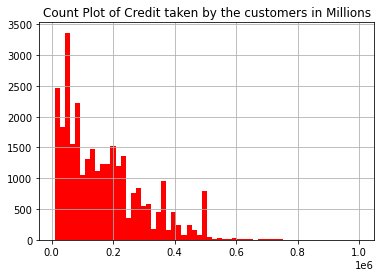

In [78]:
#Limit Bal distribution
creditData['LIMIT_BAL'].hist(bins=60, color='red').set_title("Count Plot of Credit taken by the customers in Millions")

Text(0.5, 1.0, 'Heatmap of all the attributes')

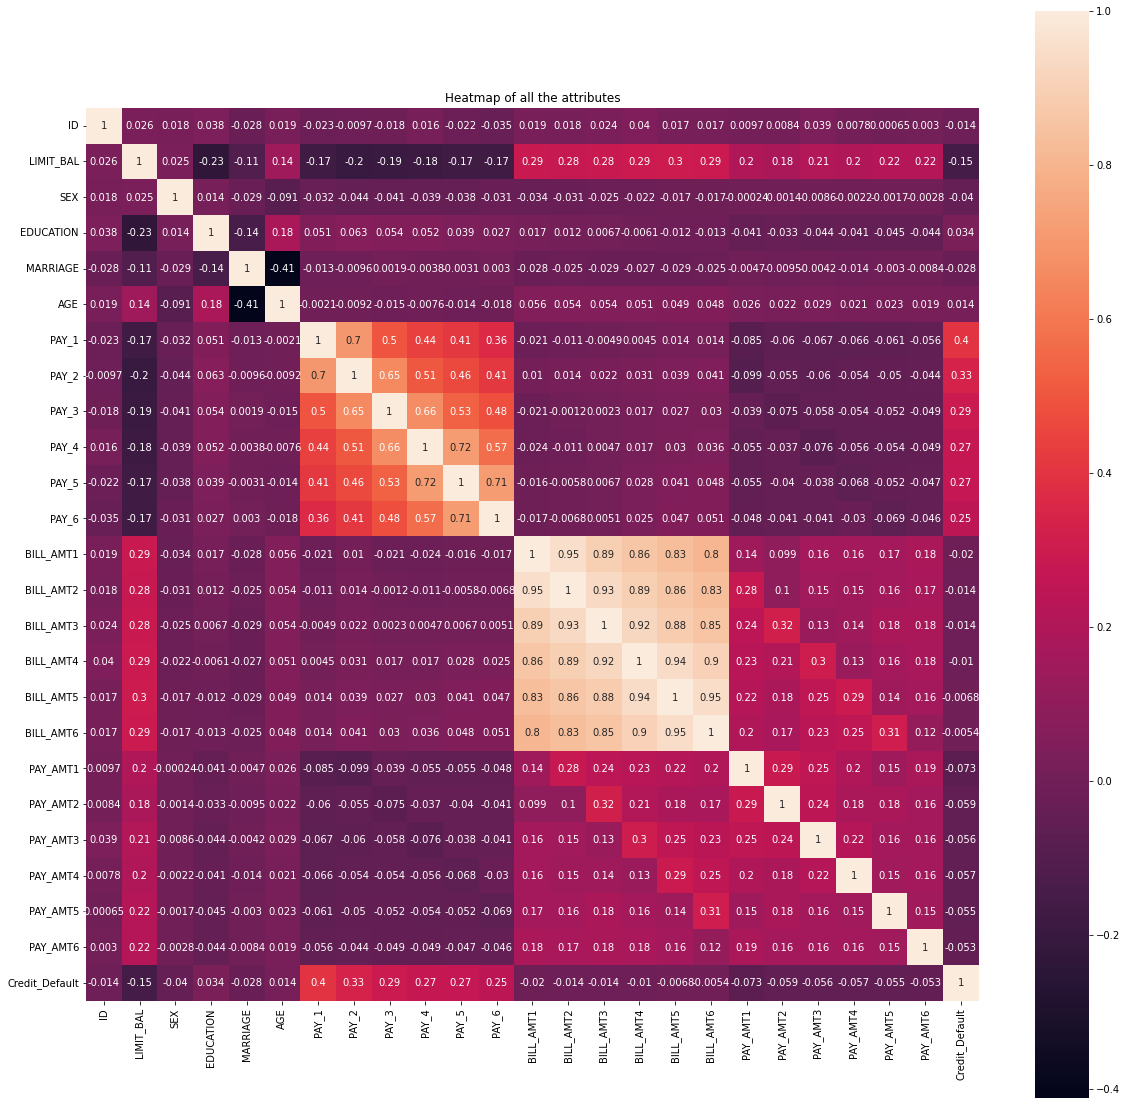

In [79]:
plt.figure(figsize = (20,20))
sns.heatmap(creditData.corr(),annot = True,square = True).set_title("Heatmap of all the attributes")

In [80]:
#Building ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE,SelectFromModel
from sklearn.model_selection import KFold,GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.pipeline import Pipeline 
from sklearn.naive_bayes import GaussianNB
from scipy.stats import randint as sp_randint
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,f1_score,roc_auc_score,roc_curve,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [81]:
X = creditData.drop(['Credit_Default','ID'], axis=1)  
y = creditData['Credit_Default']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y, random_state=42)

baseModel = LogisticRegression(random_state=0)
baseModel.fit(X_train, y_train)
y_pred = baseModel.predict(X_test)
print('Accuracy:', accuracy_score(y_pred,y_test))

Accuracy: 0.7784444444444445


/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [82]:
#One hot encoding the categorical variables using pd.get_dummies. 
creditData[['SEX','MARRIAGE','EDUCATION']] = creditData[['SEX','MARRIAGE','EDUCATION']].astype('object')

#One Hot encoding the categorical attributes
creditData = pd.get_dummies(creditData)
creditData.head()

/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


,ID,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,Credit_Default,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,1,20000,24,2,2,-1,-1,-1,-1,3913,...,1,0,1,0,1,0,0,1,0,0
1,2,120000,26,-1,2,-1,-1,-1,2,2682,...,1,0,1,0,1,0,0,0,1,0
2,3,90000,34,-1,-1,-1,-1,-1,-1,29239,...,0,0,1,0,1,0,0,0,1,0
3,4,50000,37,-1,-1,-1,-1,-1,-1,46990,...,0,0,1,0,1,0,0,1,0,0
4,5,50000,57,-1,-1,-1,-1,-1,-1,8617,...,0,1,0,0,1,0,0,1,0,0


In [83]:
X = creditData.drop(['Credit_Default','ID'], axis=1) 
y = creditData['Credit_Default']

#Creating Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y, random_state=42)

In [84]:
# create the training df by remerging X_train and y_train
creditData_train = pd.concat([X_train, y_train], axis=1)

In [85]:
creditData_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000 entries, 11018 to 27126
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   LIMIT_BAL       21000 non-null  int64
 1   AGE             21000 non-null  int64
 2   PAY_1           21000 non-null  int64
 3   PAY_2           21000 non-null  int64
 4   PAY_3           21000 non-null  int64
 5   PAY_4           21000 non-null  int64
 6   PAY_5           21000 non-null  int64
 7   PAY_6           21000 non-null  int64
 8   BILL_AMT1       21000 non-null  int64
 9   BILL_AMT2       21000 non-null  int64
 10  BILL_AMT3       21000 non-null  int64
 11  BILL_AMT4       21000 non-null  int64
 12  BILL_AMT5       21000 non-null  int64
 13  BILL_AMT6       21000 non-null  int64
 14  PAY_AMT1        21000 non-null  int64
 15  PAY_AMT2        21000 non-null  int64
 16  PAY_AMT3        21000 non-null  int64
 17  PAY_AMT4        21000 non-null  int64
 18  PAY_AMT5        21000 

In [86]:
# Separate majority and minority classes
creditNonDefaulter = creditData_train[creditData_train.Credit_Default==0]
creditDefaulter = creditData_train[creditData_train.Credit_Default==1]

print(creditData_train.Credit_Default.value_counts())

0    16355
1     4645
Name: Credit_Default, dtype: int64


In [91]:
#To handle class imbalance, we perform Synthetic Minority Oversampling Technique
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)
print(len(y_train))
print(y_train.sum())

32710
16355


In [92]:
# Combine majority class with upsampled minority class
creditData_normalized = pd.concat([X_train, y_train], axis=1)
# Display new class counts
creditData_normalized.Credit_Default.value_counts()

0    16355
1    16355
Name: Credit_Default, dtype: int64

In [93]:
#Let us define a function to evaluate the models built.
def model_eval(algo, Xtrain,ytrain,Xtest,ytest):
    algo.fit(Xtrain,ytrain)
    y_pred = algo.predict(Xtrain)
    y_train_prob = algo.predict_proba(Xtrain)[:,1]

    print('Overall Train Accuracy',accuracy_score(ytrain,y_pred))
    print('Train AUC Score',roc_auc_score(ytrain,y_train_prob))

    y_test_pred = algo.predict(Xtest)
    y_test_prob = algo.predict_proba(Xtest)[:,1]

    print('Overall Test Accuracy',accuracy_score(ytest,y_test_pred))
    print('Test AUC Score',roc_auc_score(ytest,y_test_prob))
    print('Classification Report of Test\n',  classification_report(ytest, y_test_pred))

In [94]:
#Logistic Regression
# Setup the hyperparameter grid, (not scaled data)
param_grid = {'C': np.logspace(-5, 8, 15)}

# Instantiate a logistic regression classifier
model0 = LogisticRegression(max_iter=500)

# Instantiate the RandomizedSearchCV object
model0_cv = RandomizedSearchCV(model0, param_grid, scoring='roc_auc', cv=5, random_state=0)

# Fit it to the data
model0_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(model0_cv.best_params_))

Tuned Logistic Regression Parameters: {'C': 8.483428982440725e-05}


In [95]:
model_eval(LogisticRegression(C=8.483428982440725e-05, max_iter=200), X_train, y_train, X_test, y_test)

Overall Train Accuracy 0.6229593396514828
Train AUC Score 0.6706036193853492
Overall Test Accuracy 0.5601111111111111
Test AUC Score 0.6561157037170906
Classification Report of Test
               precision    recall  f1-score   support

           0       0.86      0.52      0.65      7009
           1       0.30      0.71      0.42      1991

    accuracy                           0.56      9000
   macro avg       0.58      0.61      0.53      9000
weighted avg       0.74      0.56      0.60      9000



In [96]:
from sklearn.preprocessing import StandardScaler    
ss = StandardScaler()

# copy of datasets
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

# numerical features
num_cols = ['LIMIT_BAL',
'AGE',
'PAY_1',
'PAY_2',
'PAY_3',
'PAY_4',
'PAY_5',
'PAY_6',
'BILL_AMT1',
'BILL_AMT2',
'BILL_AMT3',
'BILL_AMT4',
'BILL_AMT5',
'BILL_AMT6',
'PAY_AMT1',
'PAY_AMT2',
'PAY_AMT3',
'PAY_AMT4',
'PAY_AMT5',
'PAY_AMT6']

# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = ss.fit(X_train_stand[[i]])
    
    # transform the training data column
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    
    # transform the testing data column
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

In [97]:
X_train_stand.head()

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT6,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,0.053987,-0.374349,-0.723349,-0.575668,-0.53932,-0.480866,-0.438998,-0.441611,1.463455,1.534605,...,0.064350,0,1,0,1,0,0,0,1,0
1,-0.423901,-0.602021,-0.723349,-0.575668,-0.53932,-0.480866,2.297383,-0.441611,-0.293900,-0.214874,...,-0.161830,0,1,1,0,0,0,0,1,0
2,-0.583197,-0.715856,-0.723349,-0.575668,-0.53932,-0.480866,-0.438998,-0.441611,0.329964,0.386741,...,-0.183154,1,0,1,0,0,0,0,1,0
3,-1.061085,-0.943528,-0.723349,-0.575668,-0.53932,-0.480866,-0.438998,-0.441611,-0.584194,-0.650883,...,-0.284693,0,1,0,1,0,0,1,0,0
4,-0.822141,-0.602021,-0.723349,-0.575668,-0.53932,-0.480866,-0.438998,-0.441611,-0.684449,-0.652159,...,-0.284693,0,1,1,0,0,0,0,1,0


In [101]:
#KNN
model1 = KNeighborsClassifier()

# Instantiate the RandomizedSearchCV object
params = {'n_neighbors': sp_randint(1,20),
         'p': sp_randint(1,5)}
model1_cv = RandomizedSearchCV(model1, param_distributions=params, cv=3, random_state=3, n_iter=50, n_jobs=-1)

# Fit it to the data
model1_cv.fit(X_train_stand, y_train)
print("Tuned KNN Parameters: {}".format(model1_cv.best_params_))

Tuned KNN Parameters: {'n_neighbors': 2, 'p': 1}


In [102]:
model_eval(KNeighborsClassifier(n_neighbors=2, p=1), X_train_stand, y_train, X_test_stand, y_test)

Overall Train Accuracy 0.9339040048914705
Train AUC Score 0.9873847185100604
Overall Test Accuracy 0.7777777777777778
Test AUC Score 0.6529896375607769
Classification Report of Test
               precision    recall  f1-score   support

           0       0.81      0.93      0.87      7009
           1       0.50      0.24      0.32      1991

    accuracy                           0.78      9000
   macro avg       0.65      0.59      0.60      9000
weighted avg       0.74      0.78      0.75      9000



In [103]:
#Decision Tree
model2 = DecisionTreeClassifier()

params = {'max_depth': sp_randint(2,20),
         'min_samples_leaf':sp_randint(1,20),
         'min_samples_split':sp_randint(2,40),
         'criterion':['gini','entropy']}

# Instantiate the RandomizedSearchCV object
model2_cv = RandomizedSearchCV(model2, param_distributions=params, cv=5, random_state=3, scoring='roc_auc', n_iter=100, n_jobs = -1)

# Fit it to the data
model2_cv.fit(X_train, y_train)
print("Tuned Decision Tree Parameters: {}".format(model2_cv.best_params_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 14, 'min_samples_leaf': 18, 'min_samples_split': 34}


In [104]:
model_eval(DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=11,
                                  min_samples_split=38), X_train, y_train, X_test, y_test)

Overall Train Accuracy 0.8530724549067563
Train AUC Score 0.9138280270903872
Overall Test Accuracy 0.7932222222222223
Test AUC Score 0.7438468112928496
Classification Report of Test
               precision    recall  f1-score   support

           0       0.86      0.88      0.87      7009
           1       0.54      0.48      0.50      1991

    accuracy                           0.79      9000
   macro avg       0.70      0.68      0.69      9000
weighted avg       0.79      0.79      0.79      9000



In [105]:
#Random Forest Classifier
model3 = RandomForestClassifier()

params = {'n_estimators' : sp_randint(50,200),
          'max_features' : sp_randint(1,24),'max_depth': sp_randint(2,10),
         'min_samples_leaf':sp_randint(1,20),
         'min_samples_split':sp_randint(2,20),
         'criterion':['gini','entropy']}

# Instantiate the RandomizedSearchCV object
model3_cv = RandomizedSearchCV(model3, param_distributions=params, cv=5, random_state=3, scoring='roc_auc', n_iter=200, n_jobs=-1, return_train_score=True)

# Fit it to the data
model3_cv.fit(X_train, y_train)
print("Tuned Random Forest Parameters: {}".format(model3_cv.best_params_))

Tuned Random Forest Parameters: {'criterion': 'entropy', 'max_depth': 9, 'max_features': 17, 'min_samples_leaf': 8, 'min_samples_split': 16, 'n_estimators': 175}


In [106]:
model_eval(RandomForestClassifier(criterion='entropy', max_depth=9, max_features=17, 
                                  min_samples_leaf=8, min_samples_split=16, n_estimators=175), X_train, y_train, X_test, y_test)

Overall Train Accuracy 0.8739834912870682
Train AUC Score 0.9423955868348636
Overall Test Accuracy 0.8112222222222222
Test AUC Score 0.7721352234291005
Classification Report of Test
               precision    recall  f1-score   support

           0       0.85      0.92      0.88      7009
           1       0.61      0.41      0.49      1991

    accuracy                           0.81      9000
   macro avg       0.73      0.67      0.69      9000
weighted avg       0.79      0.81      0.80      9000



In [107]:
#AdaBoost Classifier
model4 = AdaBoostClassifier()

#Creating a grid of hyperparameters
param_grid = {'n_estimators': [200,300],
              'algorithm': ['SAMME', 'SAMME.R'],
              'learning_rate' : [0.5, 0.75, 1.0]}

#Building a 5 fold CV GridSearchCV object
model4_cv = GridSearchCV(model4, param_grid, scoring='accuracy', cv=5,n_jobs=-1)

# Fit it to the data
model4_cv.fit(X_train, y_train)
print("Tuned AdaBoost Parameters: {}".format(model4_cv.best_params_))

Tuned AdaBoost Parameters: {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 300}


In [108]:
model_eval(AdaBoostClassifier(algorithm='SAMME.R', learning_rate=1.0, n_estimators=300), X_train, y_train,
           X_test, y_test)

Overall Train Accuracy 0.874533781718129
Train AUC Score 0.9332422824706448
Overall Test Accuracy 0.8155555555555556
Test AUC Score 0.764895374885372
Classification Report of Test
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      7009
           1       0.64      0.37      0.47      1991

    accuracy                           0.82      9000
   macro avg       0.74      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



In [109]:
#Gradient Boosting Classifier
model5 = GradientBoostingClassifier()

#Creating a grid of hyperparameters
param_grid = {'n_estimators': [200,300],
              'learning_rate' : [0.5, 0.75, 1.0]}

#Building a 5 fold CV GridSearchCV object
model5_cv = GridSearchCV(model5, param_grid, scoring='accuracy', cv=5, n_jobs=-1)
    
# Fit it to the data
model5_cv.fit(X_train, y_train)
print("Tuned Gradient Boosting Parameters: {}".format(model5_cv.best_params_))

Tuned Gradient Boosting Parameters: {'learning_rate': 0.5, 'n_estimators': 200}


In [110]:
model_eval(GradientBoostingClassifier(learning_rate=0.5, n_estimators=200), X_train, y_train, X_test, y_test)

Overall Train Accuracy 0.9022011617242434
Train AUC Score 0.9631479121198948
Overall Test Accuracy 0.8073333333333333
Test AUC Score 0.7567300462295768
Classification Report of Test
               precision    recall  f1-score   support

           0       0.84      0.93      0.88      7009
           1       0.60      0.38      0.47      1991

    accuracy                           0.81      9000
   macro avg       0.72      0.65      0.67      9000
weighted avg       0.79      0.81      0.79      9000



In [111]:
#Extreme Gradient Boosting Classifier

model6 = XGBClassifier()

param_grid = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30] ,
               "max_depth"        : [3, 4, 5, 6, 8, 10, 12, 15],
               "min_child_weight" : [1, 3, 5, 7],
               "gamma"            : [0.0, 0.1, 0.2 , 0.3, 0.4],
               "colsample_bytree" : [0.3, 0.4, 0.5 , 0.7] }

#Building a 5 fold CV GridSearchCV object
model6_cv = RandomizedSearchCV(model6, param_grid ,cv=5, scoring='roc_auc', n_iter=200, n_jobs=-1)

# Fit it to the data
model6_cv.fit(X_train, y_train)
print("Tuned XGBoost Parameters: {}".format(model6_cv.best_params_))

Tuned XGBoost Parameters: {'min_child_weight': 1, 'max_depth': 15, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.4}


In [112]:
model_eval(XGBClassifier(min_child_weight=1, max_depth=15, learning_rate=0.1, gamma=0.0, colsample_bytree=0.4), 
           X_train, y_train, X_test, y_test)

Overall Train Accuracy 0.9971262610822379
Train AUC Score 0.999970007778911
Overall Test Accuracy 0.8061111111111111
Test AUC Score 0.7602597693329499
Classification Report of Test
               precision    recall  f1-score   support

           0       0.84      0.93      0.88      7009
           1       0.60      0.37      0.46      1991

    accuracy                           0.81      9000
   macro avg       0.72      0.65      0.67      9000
weighted avg       0.79      0.81      0.79      9000



In [113]:
bestModel = RandomForestClassifier(criterion='entropy', max_depth=9, max_features=17, min_samples_leaf=8, min_samples_split=16, n_estimators=175)
model_eval(bestModel, X_train, y_train, X_test, y_test)

Overall Train Accuracy 0.8740140629776827
Train AUC Score 0.941443400641211
Overall Test Accuracy 0.8107777777777778
Test AUC Score 0.7723214301709669
Classification Report of Test
               precision    recall  f1-score   support

           0       0.85      0.92      0.88      7009
           1       0.61      0.41      0.49      1991

    accuracy                           0.81      9000
   macro avg       0.73      0.67      0.69      9000
weighted avg       0.79      0.81      0.80      9000



In [114]:
import pickle
pickle_out = open("bestModel.pkl","wb")
pickle.dump(bestModel, pickle_out)
pickle_out.close()